In [2]:
# IMPORT SCAPY
from scapy.all import *
from scapy.contrib.ethercat import EtherCatLRW
import sys
import struct
import matplotlib.pyplot as plt

# Read ethercat packets from a pcap file
packets = rdpcap('tsu-one-slave.pcapng')

# Filter out only the packets that are EtherCAT LRW packets
filtered_packets = [pkt for pkt in packets if EtherCatLRW in pkt and pkt[EtherCatLRW]._cmd == 12 and pkt[EtherCatLRW].wkc != 0]

ERROR: EtherCatBWR.guess_payload_class() - unknown or invalid DLPDU type
ERROR: EtherCatBWR.guess_payload_class() - unknown or invalid DLPDU type


ERROR: more EtherCatBWR.guess_payload_class() - unknown or invalid DLPDU type
ERROR: EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: more EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: more EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: more EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: more EtherCatBRD.guess_payload_class() - unknown or invalid DLPDU type
ERROR: EtherCatBRD.guess_p

In [3]:
len(filtered_packets)

39611

In [4]:
def test_PDOmap(PDOmap):
    # Define the expected lengths for each data type
    type_lengths = {
        'uint32': 32,
        'float': 32,
        'uint64': 64,
        'int': 32
    }

    # Initialize the current offset
    current_offset = 0

    # Loop through all items in the PDOmap
    for key, value in PDOmap.items():
        # Check if the offset matches the current offset
        assert value['offset'] == current_offset, f"Offset mismatch for key {key}. Expected {current_offset}, got {value['offset']}."

        # Check if the length matches the expected length for the data type
        assert value['length'] == type_lengths[value['type']], f"Length mismatch for key {key}. Expected {type_lengths[value['type']]}, got {value['length']}."

        # Update the current offset, dividing by 8 to convert from bits to bytes
        current_offset += value['length'] // 8
    print("PDO map looks good.")

In [5]:
PDOmap = {
    # MISO Axis 0
    'AbsolutePosition_0':     {'offset': 0, 'length': 32, 'type': 'uint32'},
    'Current_0':              {'offset': 4, 'length': 32, 'type': 'float'},
    'MotorVelocity_0':        {'offset': 8, 'length': 32, 'type': 'float'},
    'ODriveError_0':          {'offset': 12, 'length': 32, 'type': 'uint32'},
    'AxisError_0':            {'offset': 16, 'length': 32, 'type': 'uint32'},
    'MotorError_0':           {'offset': 20, 'length': 64, 'type': 'uint64'},
    'EncoderError_0':         {'offset': 28, 'length': 32, 'type': 'uint32'},
    'TorqueSensorError_0':    {'offset': 32, 'length': 32, 'type': 'uint32'},
    'ControllerError_0':      {'offset': 36, 'length': 32, 'type': 'uint32'},
    'AxisState_0':            {'offset': 40, 'length': 32, 'type': 'uint32'},
    'OdriveTemperature_0':    {'offset': 44, 'length': 32, 'type': 'float'},
    'MotorTemperature_0':     {'offset': 48, 'length': 32, 'type': 'float'},
    'ShadowCount_0':          {'offset': 52, 'length': 32, 'type': 'int'},
    'Torque_0':               {'offset': 56, 'length': 32, 'type': 'float'},
    # MISO Axis 1
    'AbsolutePosition_1':     {'offset': 60, 'length': 32, 'type': 'uint32'},
    'Current_1':              {'offset': 64, 'length': 32, 'type': 'float'},
    'MotorVelocity_1':        {'offset': 68, 'length': 32, 'type': 'float'},
    'ODriveError_1':          {'offset': 72, 'length': 32, 'type': 'uint32'},
    'AxisError_1':            {'offset': 76, 'length': 32, 'type': 'uint32'},
    'MotorError_1':           {'offset': 80, 'length': 64, 'type': 'uint64'},
    'EncoderError_1':         {'offset': 88, 'length': 32, 'type': 'uint32'},
    'TorqueSensorError_1':    {'offset': 92, 'length': 32, 'type': 'uint32'},
    'ControllerError_1':      {'offset': 96, 'length': 32, 'type': 'uint32'},
    'AxisState_1':            {'offset': 100, 'length': 32, 'type': 'uint32'},
    'OdriveTemperature_1':    {'offset': 104, 'length': 32, 'type': 'float'},
    'MotorTemperature_1':     {'offset': 108, 'length': 32, 'type': 'float'},
    'ShadowCount_1':          {'offset': 112, 'length': 32, 'type': 'int'},
    'Torque_1':               {'offset': 116, 'length': 32, 'type': 'float'},
    'AIEAbsolutePosition_1':  {'offset': 120, 'length': 32, 'type': 'uint32'},
    #MOSI Axis 0
    'TargetTorque_0':         {'offset': 124, 'length': 32, 'type': 'float'},
    'TargetPosition_0':       {'offset': 128, 'length': 32, 'type': 'float'},
    'FuzzyTorque_0':          {'offset': 132, 'length': 32, 'type': 'float'},
    'FuzzyPosition_0':        {'offset': 136, 'length': 32, 'type': 'float'},
    'PositionP_0':            {'offset': 140, 'length': 32, 'type': 'float'},
    'PositionI_0':            {'offset': 144, 'length': 32, 'type': 'float'},
    'PositionD_0':            {'offset': 148, 'length': 32, 'type': 'float'},
    'TorqueP_0':              {'offset': 152, 'length': 32, 'type': 'float'},
    'TorqueD_0':              {'offset': 156, 'length': 32, 'type': 'float'},
    'RequestedState_0':       {'offset': 160, 'length': 32, 'type': 'uint32'},
    #MOSI Axis 1
    'TargetTorque_1':         {'offset': 164, 'length': 32, 'type': 'float'},
    'TargetPosition_1':       {'offset': 168, 'length': 32, 'type': 'float'},
    'FuzzyTorque_1':          {'offset': 172, 'length': 32, 'type': 'float'},
    'FuzzyPosition_1':        {'offset': 176, 'length': 32, 'type': 'float'},
    'PositionP_1':            {'offset': 180, 'length': 32, 'type': 'float'},
    'PositionI_1':            {'offset': 184, 'length': 32, 'type': 'float'},
    'PositionD_1':            {'offset': 188, 'length': 32, 'type': 'float'},
    'TorqueP_1':              {'offset': 192, 'length': 32, 'type': 'float'},
    'TorqueD_1':              {'offset': 196, 'length': 32, 'type': 'float'},
    'RequestedState_1':       {'offset': 200, 'length': 32, 'type': 'uint32'},
}

# Run the test
test_PDOmap(PDOmap)

PDO map looks good.


In [6]:
def read_offset_data(data, byte_offset, bit_length):
    byte_length = bit_length // 8
    return data[byte_offset:byte_offset + byte_length]

def bytes_to_binary_string(byte_data):
    binary_string = ''.join(f'{byte:08b} ' for byte in byte_data)
    return binary_string

def print_byte_readout(read_data):
    # Read as binary
    binary_value = bytes_to_binary_string(read_data)
    print("binary:\t", binary_value)

    # Read as hex
    hex_value = read_data.hex()
    print("hex:\t", hex_value)

    if len(read_data) == 4:
        # Read as int32
        int32_value = struct.unpack('>i', read_data)[0]
        print("int32:\t", int32_value)

        # Read as uint32
        uint32_value = struct.unpack('>I', read_data)[0]
        print("uint32:\t", uint32_value)

        # Read as float
        float_value = struct.unpack('>f', read_data)[0]
        print("float:\t", float_value)

    if len(read_data) == 8:
        # Read as uint64
        uint64_value = struct.unpack('>Q', read_data)[0]
        print("uint64:\t", uint64_value)



In [7]:
def reverse_chunks(data, chunk_size):
            temp = [data[i:i + chunk_size] for i in range(0, len(data), chunk_size)][::-1]
            return bytearray().join(temp)

def get_data_structure_format(data_structure):
    data_structure_formats = {
        'uint32': '>I',
        'uint64': '>Q',
        'int': '>i',
        'float': '>f',
    }
    try:
        return data_structure_formats[data_structure]
    except KeyError:
        raise ValueError("Invalid data structure")

def split_and_reverse_packet(packet, slave):
    data = bytearray(packet[EtherCatLRW].data)[::-1]

    slaves = len(packet) // 204
    miso_length = 124
    mosi_length = 80

    mosi_offset = slaves * miso_length

    data_miso = data[0:mosi_offset]
    data_miso = reverse_chunks(data_miso, 4)
        
    data_mosi = data[mosi_offset:]
    data_mosi = reverse_chunks(data_mosi, 4)

    data = data_miso[miso_length * (slave - 1):miso_length * slave] + data_mosi[mosi_length * (slave - 1):mosi_length * slave]

    return data

def process_packet(packets, byte_offset, byte_length, data_structure, slave):
    all_packets_data = []
    for packet in packets:
        data = split_and_reverse_packet(packet, slave)
        read_data = read_offset_data(data, byte_offset, byte_length)
        struct_format = get_data_structure_format(data_structure)
        all_packets_data.append(struct.unpack(struct_format, read_data)[0])
    return all_packets_data



In [8]:
input_data = filtered_packets[22]
print(len(input_data.data))
temp_data = split_and_reverse_packet(input_data, 1)
print(len(temp_data))

204
204


In [9]:
# Retrieve the pdo data from the EtherCAT packet, as a sample
data_list = (filtered_packets[100][EtherCatLRW].data)
reversed_data_list = split_and_reverse_packet(filtered_packets[100], 1)

In [10]:
# read all data, at PDO map offsets and lengths
for key, value in PDOmap.items():
    print(key)
    offset = value['offset']
    length = value['length']
    print_byte_readout(read_offset_data(reversed_data_list, offset, length))
    print()

AbsolutePosition_0
binary:	 00000000 00001111 11111111 11100111 
hex:	 000fffe7
int32:	 1048551
uint32:	 1048551
float:	 1.4693329060662513e-39

Current_0
binary:	 00000000 00000000 00000000 00000000 
hex:	 00000000
int32:	 0
uint32:	 0
float:	 0.0

MotorVelocity_0
binary:	 00000000 00000000 00000000 00000000 
hex:	 00000000
int32:	 0
uint32:	 0
float:	 0.0

ODriveError_0
binary:	 00000000 00000000 00000000 00000000 
hex:	 00000000
int32:	 0
uint32:	 0
float:	 0.0

AxisError_0
binary:	 00000000 00000000 00000000 00000000 
hex:	 00000000
int32:	 0
uint32:	 0
float:	 0.0

MotorError_0
binary:	 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000 
hex:	 0000000000000000
uint64:	 0

EncoderError_0
binary:	 00000000 00000000 00000000 00000000 
hex:	 00000000
int32:	 0
uint32:	 0
float:	 0.0

TorqueSensorError_0
binary:	 00000000 00000000 00000000 00000000 
hex:	 00000000
int32:	 0
uint32:	 0
float:	 0.0

ControllerError_0
binary:	 00000000 00000000 00000000 00000000 
hex:

AxisState_0, offset: 40, length: 32, data: uint32, slave: 1
max value:  0 occurs at:  0


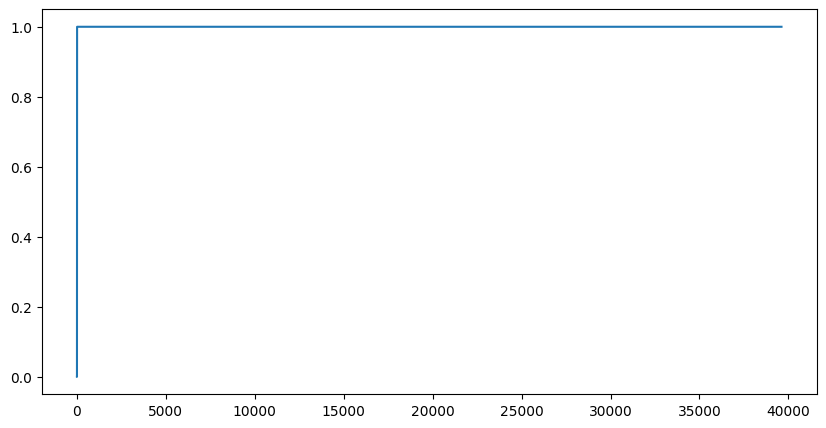

In [11]:
# AIEAbsolutePosition, Torque_1, AxisError_0

# object_name = 'AIEAbsolutePosition_1'

# offset = PDOmap[object_name]["offset"]
# length = PDOmap[object_name]["length"]
# data_structure = PDOmap[object_name]["type"]

# slave = 2

# print(f"{object_name}, offset: {offset}, length: {length}, data: {data_structure}, slave: {slave}")
# plt.figure(figsize=(10, 5))
# # plt.ylim(-10000, 10000)
# # plt.xlim(100, 800)
# processed = process_packet(filtered_packets, offset, length, data_structure, slave)
# # print(min(processed[10000:15000]))
# print("max value: ", max(processed), "occurs at: ", processed.index(max(processed)))
# plt.plot(processed)
# plt.show()

# object_name = 'RequestedState_0'

# offset = PDOmap[object_name]["offset"]
# length = PDOmap[object_name]["length"]
# data_structure = PDOmap[object_name]["type"]

# slave = 2

# print(f"{object_name}, offset: {offset}, length: {length}, data: {data_structure}, slave: {slave}")
# plt.figure(figsize=(10, 5))
# # plt.ylim(-10000, 10000)
# # plt.xlim(100, 800)
# processed = process_packet(filtered_packets, offset, length, data_structure, slave)
# # print(min(processed[10000:15000]))
# print("max value: ", max(processed), "occurs at: ", processed.index(max(processed)))
# plt.plot(processed)
# plt.show()

object_name = 'AxisState_0'

offset = PDOmap[object_name]["offset"]
length = PDOmap[object_name]["length"]
data_structure = PDOmap[object_name]["type"]

slave = 1

print(f"{object_name}, offset: {offset}, length: {length}, data: {data_structure}, slave: {slave}")
plt.figure(figsize=(10, 5))
# plt.ylim(-10000, 10000)
processed = process_packet(filtered_packets, offset, length, data_structure, slave)
# plt.xlim(9270, 9300)

# print(min(processed[10000:15000]))
print("max value: ", min(processed), "occurs at: ", processed.index(min(processed)))
# print_byte_readout(read_offset_data(bytes(processed), 0, offset))

plt.plot(processed)
plt.show()



In [12]:
# #loop and plot all data for PDOmap
# for slave in range(1,3):

#     for object_name in PDOmap:
#         offset = PDOmap[object_name]["offset"]
#         length = PDOmap[object_name]["length"]
#         data_structure = PDOmap[object_name]["type"]

#         print(f"{object_name}, offset: {offset}, length: {length}, data: {data_structure}, slave: {slave}")
#         plt.figure(figsize=(5, 2))
#         processed = process_packet(filtered_packets,  offset, length, data_structure, slave)
#         plt.plot(processed)
#         plt.show()

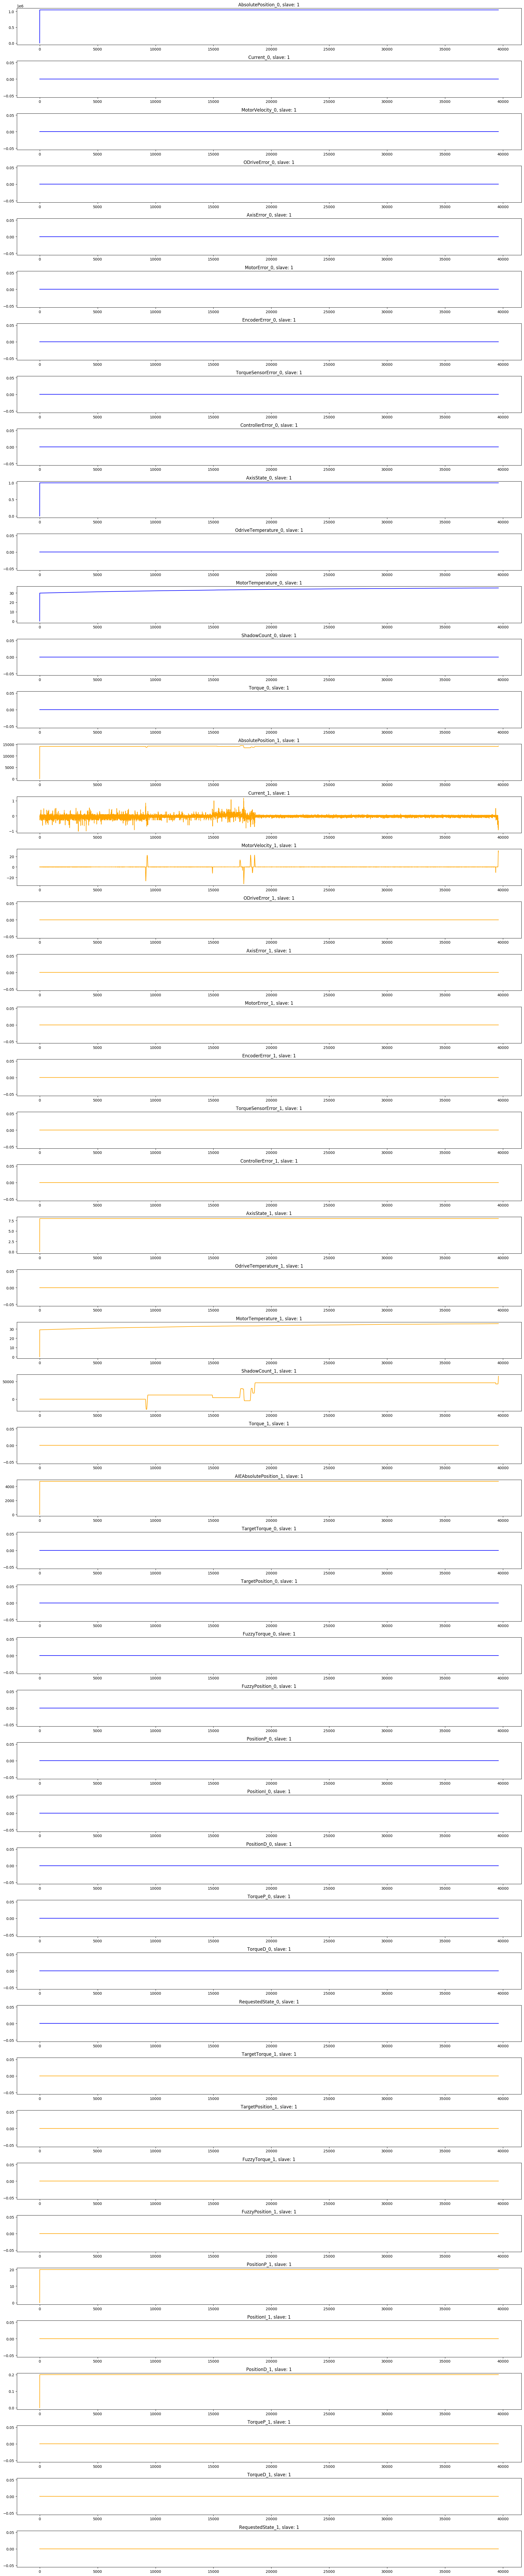

In [18]:

# Determine the number of rows needed
num_rows = len(PDOmap)
num_slaves = len(filtered_packets[0].data)//204

# Create a new figure
fig, axs = plt.subplots(num_rows, num_slaves, figsize=(20, num_rows*2))

# Loop and plot all data for PDOmap
for slave in range(1, num_slaves+1):
    for i, object_name in enumerate(PDOmap):
        offset = PDOmap[object_name]["offset"]
        length = PDOmap[object_name]["length"]
        data_structure = PDOmap[object_name]["type"]
        # print(f"{object_name}, offset: {offset}, length: {length}, data: {data_structure}, slave: {slave}")
        
        processed = process_packet(filtered_packets,  offset, length, data_structure, slave)
        
        color = 'blue' if '_0' in object_name else 'orange' if '_1' in object_name else 'black'

        if slave == 1:
            axs[i].plot(processed, color=color)
            axs[i].set_title(f"{object_name}, slave: {slave}")
        else:
            axs[i, (slave-1)%num_slaves].plot(processed, color=color)
            axs[i, (slave-1)%num_slaves].set_title(f"{object_name}, slave: {slave}")

        # Set the x-axis limits
        # axs[i, (slave-1)%num_slaves].set_xlim([9270, 9300])


# Show the plot
plt.tight_layout()
plt.show()

In [15]:
print(axs.shape)

(49,)
